In [60]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 8.3 PCA

In [3]:
import numpy as np

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [6]:
#주성분 분석 
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0] #array([0.93636116, 0.29854881, 0.18465208])
c2 = Vt.T[:, 1] #array([-0.34027485,  0.90119108,  0.2684542 ])

In [12]:
#첫 두 개의 주성분으로 정의된 평면에 훈련 세트를 투영 = PCA변환 
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [15]:
#3D 데이터셋의 처음 두 주성분에 대한 설명된 분산의 비율 
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [17]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [18]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d #154

154

In [32]:
pca = PCA(n_components = d)
X_reduced = pca.fit_transform(X_train)

In [29]:
X_reduced

array([[-5.63825594e+02,  3.76211585e+02,  5.47809263e+02, ...,
         4.82058892e+01, -1.91493701e+01, -4.43994817e-01],
       [-2.47606773e+02,  5.94115812e+02, -7.61176589e+02, ...,
        -2.58493091e+00, -1.98368718e+01,  2.33418110e+01],
       [-7.61068947e+01, -7.18886267e+02, -6.21347158e+02, ...,
        -6.26469450e+01, -6.78129283e+01, -4.30776717e+01],
       ...,
       [ 4.46897686e+02,  2.00538445e+02, -3.26087854e+02, ...,
        -4.32439831e+01, -3.17267547e+01, -5.03358647e+01],
       [ 7.94828987e+02, -1.64978790e+02,  4.84146893e+01, ...,
        -2.34583745e+01, -7.23373049e+00, -1.57444621e+01],
       [-9.03114239e+02, -4.56076540e+02, -1.39585123e+02, ...,
        -1.31741735e+01,  3.78794323e+01, -1.69846251e+00]])

In [33]:
pca.n_components_ #154

154

In [34]:
np.sum(pca.explained_variance_ratio_) #0.950013183478213

0.950013183478213

In [35]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

In [31]:
X_reduced

array([[-563.82559445,  376.21158523,  547.80926275, ...,   27.55021763,
         -28.99365655,   22.0882605 ],
       [-247.60677317,  594.11581251, -761.17658851, ...,   21.21515701,
         -12.91702701,  -71.9678063 ],
       [ -76.10689476, -718.88626736, -621.34715832, ...,  -15.63703969,
          27.32682087,  -46.49334898],
       ...,
       [ 446.89768572,  200.53844512, -326.08785445, ...,  -16.17022423,
          28.40929801,   53.86153314],
       [ 794.82898692, -164.97878958,   48.41468923, ...,  -51.41226115,
           3.66933099,    7.84388081],
       [-903.11423891, -456.07654002, -139.58512285, ...,    3.89819809,
          58.74804585,    2.75381847]])

In [36]:
pca.n_components_ #154

154

In [37]:
np.sum(pca.explained_variance_ratio_) #0.9503684424557437

0.9503684424557437

In [38]:
pca = PCA(n_components = 154) 
X_reduced = pca.fit_transform(X_train) #154차원으로 압축
X_recovered = pca.inverse_transform(X_reduced) #784차원으로 복원

In [40]:
rnd_pca = PCA(n_components = 154, svd_solver = "randomized")
X_reduced = rnd_pca.fit_transform(X_train)

In [43]:
from sklearn.decomposition import IncrementalPCA 

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X_train)

In [45]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [46]:
X_mm = np.memmap(filename, dtype='float32',mode='readonly',shape=(m,n))

batch_size = m // n_batches 
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)

# 8.4 커널 PCA

In [57]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [55]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

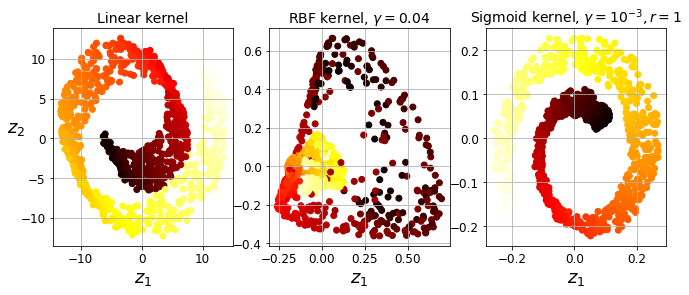

In [61]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma" : np.linspace(0.03, 0.05, 10),
    "kpca__kernel" : ["rbf","sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [63]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [64]:
rbf_pca = KernelPCA(n_components =2, kernel='rbf', gamma=0.0433,
                   fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X, X_preimage) #9.917764172135161e-27

9.917764172135161e-27

# 8.5 LLE

In [73]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [74]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

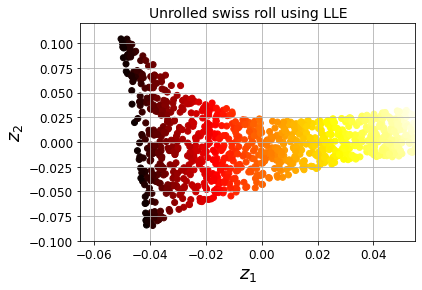

In [75]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

# 8.6 다른 축소 기법

In [76]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [77]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [78]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

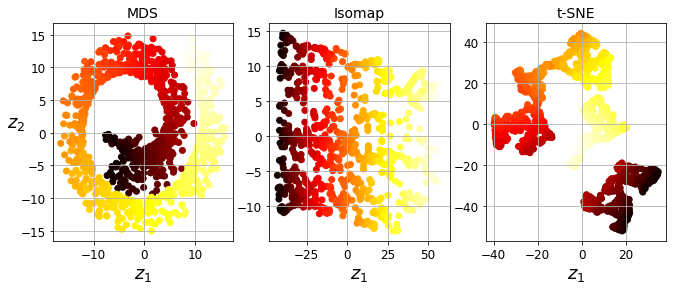

In [80]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)